# <center>NLP_Project_2_Part_One</center>

In [1]:
# Importing the libraries

# For removal of warnings
import warnings
warnings.filterwarnings('ignore')

# For handling randomness in the output of the models
import numpy as np
import tensorflow as tf
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

# Basic libraries
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import operator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For NLP using deep learning
from keras.datasets import imdb 
from keras.preprocessing.sequence import pad_sequences 
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Flatten, Embedding, LSTM, Dropout, MaxPooling1D, Conv1D, LeakyReLU
from keras.backend import clear_session
from keras.callbacks import EarlyStopping

## 1. Import and analyse the data set

Hint: 
- Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

In [2]:
# Taking 10000 words as per the requirements

ten_k_words = 10000

In [3]:
# Extracting the top ten thousand words

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=ten_k_words)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
# Concatenating the training and testing data for independent and dependent variables

# Merging the features

X = np.concatenate((X_train, X_test), axis=0) 

# Merging the labels

y = np.concatenate((y_train, y_test), axis=0) 

In [5]:
# Organising the data in proper form

whole_data = pd.DataFrame({'Comment': X, 'Sentiment Type': y}) 

In [6]:
# Viewing a random sample of the data
# Refresh multiple times to analyse the content

whole_data.sample(10)

,Comment,Sentiment Type
33553,"[1, 115, 330, 4, 622, 2091, 7346, 115, 330, 4,...",0
9427,"[1, 444, 14, 20, 9, 2150, 5, 144, 28, 115, 77,...",0
199,"[1, 14, 20, 9, 44, 2, 6, 8639, 37, 9, 839, 145...",0
12447,"[1, 3862, 7811, 790, 2, 3876, 8107, 10, 10, 89...",0
39489,"[1, 14, 65, 69, 6, 52, 114, 8, 12, 44, 689, 37...",0
42724,"[1, 13, 28, 8, 135, 15, 14, 22, 16, 6240, 1055...",1
10822,"[1, 146, 633, 24, 99, 83, 6, 3383, 123, 607, 1...",1
49498,"[1, 7481, 1124, 167, 1804, 419, 23, 4, 1289, 7...",1
4144,"[1, 14, 20, 64, 214, 6, 333, 323, 88, 13, 157,...",0
36958,"[1, 14, 20, 16, 66, 163, 60, 151, 12, 286, 981...",0


In [7]:
# Checking the length of the dataset

len(whole_data)

50000

In [8]:
# Checking the size of the dataset

whole_data.size

100000

In [9]:
# Checking for null values

whole_data.isnull().any()

Comment           False
Sentiment Type    False
dtype: bool

In [10]:
# Checking the split of sentiment types

whole_data['Sentiment Type'].value_counts()

1    25000
0    25000
Name: Sentiment Type, dtype: int64

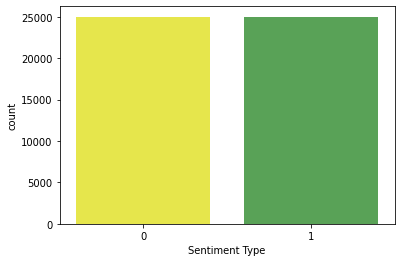

In [11]:
sns.countplot(x=whole_data['Sentiment Type'],palette='Set1_r');

- We have concatenated the whole data and can be seen from the
- As we can see that the reviews are in a different form which has already been mentioned in the project's description.
- Also it has been stated that sentiment type can either be positive or negative and it's well balanced.

In [12]:
# Checking the number of words

print("Number of words: ", len(np.unique(np.hstack(whole_data['Comment']))))

Number of words:  9998


In [13]:
# Extracting the length of the comments

length = [len(i) for i in whole_data['Comment']]

# Checking the stats associated with the comments

pd.Series(length).describe()

count    50000.000000
mean       234.758920
std        172.913224
min          7.000000
25%        129.000000
50%        176.000000
75%        285.000000
max       2494.000000
dtype: float64

In [14]:
# Fixing the padding based on the above data

max_len = 300

## 2. Perform relevant sequence adding on the data

In [15]:
# Padding the data appropriately

X = pad_sequences(whole_data['Comment'], maxlen=max_len)

## 3. Perform following data analysis:
- Print shape of features and labels
- Print value of any one feature and it's label

In [16]:
print('Shape of features: ', X.shape)
print('Shape of labels: ', y.shape)

Shape of features:  (50000, 300)
Shape of labels:  (50000,)


In [17]:
print('Value of a Feature :\n ', X[0], '\n')
print('Value of the  Label for the above mentioned Label : ', y[0])

Value of a Feature :
  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    1   14
   22   16   43  530  973 1622 1385   65  458 4468   66 3941    4  173
   36  256    5   25  100   43  838  112   50  670    2    9   35  480
  284    5  150    4  172  112  167    2  336  385   39    4  172 4536
 1111   17  546   38   13  447    4  192   50   16    6  147 2025   19
   14   22    4 1920 4613  469    4   22   71   87   12   16   43  530
   38   76   15   13 1247    4   22   17  515   17   12   16  626   18
    2    5   62  386   12    8  316    8  106    5    4 2223 5244   16
  480   66 3785   33    4  130   12   16   38  619    

By just looking at this data, we can't analyse anything and hence we will decode and check

## 4. Decode the feature value to get original sentence

In [18]:
# Getting the word index from the data set and sorting it for verification and matching 

word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [19]:
# Decoding the specific comment and checking

inverted_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_sequence = ' '.join( [inverted_word_index.get(i-3, '*') for i in X[0]])
print(decoded_sequence) 


* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert * is an amazing actor and now the same being director * father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for * and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also * to the two little boy's that played the * of norman and paul they were just brilliant children are often left out of the * list i think because the st

## 5. Design, train, tune and test a sequential model_1.

In [20]:
# Splitting the data based on training, validation and testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = random_state, shuffle = True, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.25, random_state = random_state, shuffle = True,stratify=y_train)

In [21]:
# Shape of training data

(x_train.shape, y_train.shape)

((31875, 300), (31875,))

In [22]:
# Shape of validation data

(x_valid.shape, y_valid.shape)

((10625, 300), (10625,))

In [23]:
# Shape of testing data

(x_test.shape, y_test.shape)

((7500, 300), (7500,))

In [24]:
# Building the model
# Please note the values were altered and tuned for best results

clear_session()

# Creating the model

model_1 = Sequential()

# Input Layer

embedding_size = 50
model_1.add(Embedding(ten_k_words, embedding_size, input_length = max_len))
model_1.add(Dropout(0.25))
model_1.add(Conv1D(256, 5, padding = 'same', activation = 'relu'))
model_1.add(Conv1D(128, 5, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling1D(pool_size = 2))
model_1.add(Conv1D(64, 5, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling1D(pool_size = 2))
model_1.add(LSTM(75))

# Output Layer

model_1.add(Dense(1, activation = 'sigmoid'))

In [25]:
# Compiling the model

adam_opt = tf.keras.optimizers.Adam(lr=0.001)
model_1.compile(loss='binary_crossentropy', optimizer= adam_opt, metrics=['accuracy'])

In [26]:
# Summarising the model

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           500000    
                                                                 
 dropout (Dropout)           (None, 300, 50)           0         
                                                                 
 conv1d (Conv1D)             (None, 300, 256)          64256     
                                                                 
 conv1d_1 (Conv1D)           (None, 300, 128)          163968    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 150, 128)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 150, 64)           41024     
                                                        

In [27]:
# Setting parameters for training the model

batch_size = 128
epochs = 10

In [28]:
# Initialising callbacks

early_Stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)  

In [29]:
# Fitting the model

history = model_1.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs = epochs, batch_size = batch_size, verbose=2, callbacks = [early_Stop])

Epoch 1/10
250/250 - 22s - loss: 0.4035 - accuracy: 0.7912 - val_loss: 0.2913 - val_accuracy: 0.8792 - 22s/epoch - 90ms/step
Epoch 2/10
250/250 - 8s - loss: 0.1998 - accuracy: 0.9233 - val_loss: 0.2588 - val_accuracy: 0.8983 - 8s/epoch - 30ms/step
Epoch 3/10
250/250 - 8s - loss: 0.1496 - accuracy: 0.9447 - val_loss: 0.2824 - val_accuracy: 0.8997 - 8s/epoch - 30ms/step
Epoch 4/10
250/250 - 8s - loss: 0.1103 - accuracy: 0.9617 - val_loss: 0.3522 - val_accuracy: 0.8751 - 8s/epoch - 30ms/step
Epoch 5/10
250/250 - 8s - loss: 0.0901 - accuracy: 0.9689 - val_loss: 0.3668 - val_accuracy: 0.8721 - 8s/epoch - 30ms/step
Epoch 5: early stopping


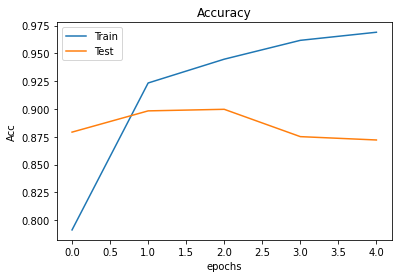

In [30]:
# Plotting and comparing accuracy

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

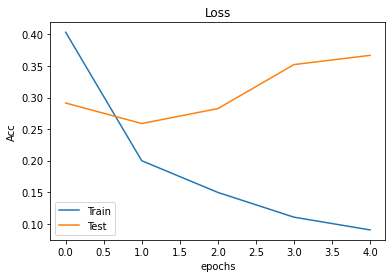

In [31]:
# Plotting and comparing loss

plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [32]:
# Evaluating model on test data

test_loss, test_accuracy = model_1.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %.2f%%' % (test_accuracy*100))
print('Test Loss: %.4f'% test_loss)

Test Accuracy: 87.49%
Test Loss: 0.3502


In [33]:
# Predicting for all of test dataset

predictions_1 = model_1.predict(x_test)
predictions_1 = [round(x[0]) for x in predictions_1]

In [34]:
pd.Series(predictions_1).value_counts()

0    4244
1    3256
dtype: int64

If we keep a threshold of 0.5 then we get the prediction distribution as shown above

In [35]:
# Classification Report

print(classification_report(y_test, predictions_1))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3750
           1       0.93      0.81      0.87      3750

    accuracy                           0.87      7500
   macro avg       0.88      0.87      0.87      7500
weighted avg       0.88      0.87      0.87      7500



Here we can see that class level accuracy is also decent and metric of importance can chosen based on the business requirements

Let's change the model architecture and see the results if it gets better

In [36]:
# Building the next model
# Please note the values were altered and tuned for best results

clear_session()

# Creating the model

model_2 = Sequential()

# Input Layer

embedding_size = 20
model_2.add(Embedding(ten_k_words, embedding_size, input_length = max_len))
model_2.add(Dropout(0.15))

model_2.add(Conv1D(128, 5, padding = 'same', activation = LeakyReLU(alpha=0.05)))
model_2.add(MaxPooling1D(pool_size = 2))
model_2.add(Conv1D(64, 5, padding = 'same', activation = LeakyReLU(alpha=0.05)))
model_2.add(MaxPooling1D(pool_size = 2))
model_2.add(Conv1D(32, 5, padding = 'same', activation = LeakyReLU(alpha=0.05)))
model_2.add(MaxPooling1D(pool_size = 2))

model_2.add(LSTM(75))

# Output Layer

model_2.add(Dense(1, activation = 'sigmoid'))

In [37]:
# Compiling the model

adam_opt = tf.keras.optimizers.Adam(lr=0.0001)
model_2.compile(loss='binary_crossentropy', optimizer= adam_opt, metrics=['accuracy'])

In [38]:
# Summarising the model

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 20)           200000    
                                                                 
 dropout (Dropout)           (None, 300, 20)           0         
                                                                 
 conv1d (Conv1D)             (None, 300, 128)          12928     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 150, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 150, 64)           41024     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 75, 64)           0         
 1D)                                                    

In [39]:
# Setting parameters for training the model

batch_size = 64
epochs = 10

In [40]:
# Initialising callbacks

early_Stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience =3)  

In [41]:
# Fitting the model

history = model_1.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs = epochs, batch_size = batch_size, verbose=2, callbacks = [early_Stop])

Epoch 1/10
499/499 - 10s - loss: 0.0997 - accuracy: 0.9640 - val_loss: 0.3552 - val_accuracy: 0.8889 - 10s/epoch - 19ms/step
Epoch 2/10
499/499 - 9s - loss: 0.0717 - accuracy: 0.9760 - val_loss: 0.3911 - val_accuracy: 0.8882 - 9s/epoch - 18ms/step
Epoch 3/10
499/499 - 9s - loss: 0.0570 - accuracy: 0.9819 - val_loss: 0.4082 - val_accuracy: 0.8868 - 9s/epoch - 18ms/step
Epoch 4/10
499/499 - 9s - loss: 0.0400 - accuracy: 0.9882 - val_loss: 0.4395 - val_accuracy: 0.8831 - 9s/epoch - 18ms/step
Epoch 4: early stopping


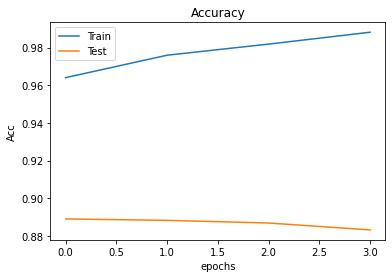

In [42]:
# Plotting and comparing accuracy

plt.figure()
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.title('Accuracy')
plt.ylabel('Acc')
plt.xlabel('epochs')
plt.legend()
plt.show()

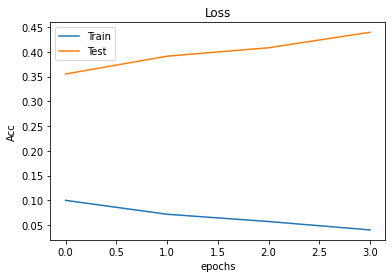

In [43]:
# Plotting and comparing loss

plt.figure()
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.title('Loss')
plt.ylabel('Acc')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [44]:
# Evaluating model on test data

test_loss, test_accuracy = model_2.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %.2f%%' % (test_accuracy*100))
print('Test Loss: %.4f'% test_loss)

Test Accuracy: 48.68%
Test Loss: 0.6932


In [45]:
# Predicting for all of test dataset

predictions_2 = model_2.predict(x_test)
predictions_2 = [round(x[0]) for x in predictions_2]

In [46]:
pd.Series(predictions_2).value_counts()

1    4267
0    3233
dtype: int64

If we keep a threshold of 0.5 then we get the prediction distribution as shown above

In [47]:
# Classification Report

print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.48      0.42      0.45      3750
           1       0.49      0.56      0.52      3750

    accuracy                           0.49      7500
   macro avg       0.49      0.49      0.48      7500
weighted avg       0.49      0.49      0.48      7500



Here we can see that class level accuracy is affected and also we getting a model that is too much overfitting. Each is not predicted appropriately and hence we will go for the previous model.

## 6. Use the designed model to print the prediction on any one sample

We can see that Model_1 gave us good results and hence we will predict further using the same

In [48]:
# Creating word dictionary for comparing with the random input sample

word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }

# For padding

word_dict[''] = 0  

# For start

word_dict['Start'] = 1 

# For the Unknowns 

word_dict['?'] = 2 

reverse_word_dict = { value:key for key, value in word_dict.items() }

In [49]:
def predict_on_sample(text):
    
    """Function predicts postive or negative sentiments based on any given text given as input"""

    # Pre-processing the input

    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Formatting the input

    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < ten_k_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = pad_sequences([input], maxlen=max_len)

    # Predicting on sample 
    
    result = model_1.predict(np.array([padded_input][0]))[0][0]

    # Checking the result for Positive or Negative Prediction
    
    predicted_sentiment = ''
    
    if round(result) == 1:
      predicted_sentiment = 'Sentiment is Positive'
    else:
      predicted_sentiment = 'Sentiment is Negative' 

    return result, predicted_sentiment

In [50]:
# Passing a random positive movie review of from web for prediction

result, predicted_sentiment = predict_on_sample("Am a huge Disney fan and have been for pretty much my whole life, 'Cinderella', 'Peter Pan' and 'The Lion King' being my first Disney films (still love all three, especially 'The Lion King'). 'Aladdin' is one of my favourites from them as well as being one of my favourite animated and even overall films. Great animation, songs, characters and one of Disney's best voice acting performances ever in Robin Williams. Will admit to not being overly excited hearing that there was going to be a live-action remake and was a bit mixed on the trailer.")
print("Predicted Probability : ", result)
print(predicted_sentiment)

Predicted Probability :  0.99763966
Sentiment is Positive


In [51]:
# Passing a random negative movie review from web for prediction

result, predicted_sentiment = predict_on_sample("Not good. 80% to 90% copies from a previous film. It was done to make money. A movie that was successful in the past is resurrected to make guaranteed cash now. Their using you (the public) to make cash. Disney is recycling a lot of films, like Star Wars. Some original material was created, like the dance scene toward the beginning. The genie was unpleasent. The songs in this film did something bad to my brain.")
print("Predicted Probability : ", result)
print(predicted_sentiment)

Predicted Probability :  0.005172526
Sentiment is Negative


We can see that the comments by people are getting classified aptly by the model_1 and our sentiment analysis model is working decently.

# <center>NLP_Project_2_Part_Two</center>

In [52]:
# Accessing the google drive to import the required files

from google.colab import drive  
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [53]:
# Importing the necessary libraries

# For handling randomness in the output of the models
import numpy as np
import tensorflow as tf
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

# For removal of warnings
import warnings
warnings.filterwarnings("ignore")

# Basic
import os
import string
import regex as re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from wordcloud import WordCloud 

# For NLP using deep learning
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense,Dropout, GlobalAveragePooling1D, Bidirectional, LSTM
from keras.regularizers import L2
from keras.backend import clear_session
from keras.callbacks import EarlyStopping

In [54]:
# Providing the file path to get the current working directory

file_path = r'/content/drive/MyDrive/Colab Data/NLP_Project_2/Part_2'
os.chdir(file_path)
os.getcwd()

'/content/drive/MyDrive/Colab Data/NLP_Project_2/Part_2'

## 1. Read and explore the data

In [55]:
# Reading the data

data = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

In [56]:
# Checking out some random samples
# Refresh multiple times to see different data

data.sample(5)

,is_sarcastic,headline,article_link
27927,0,states slow to shut down weak teacher educatio...,https://www.huffingtonpost.com/entry/teacher-e...
1660,1,drone places fresh kill on steps of white house,https://www.theonion.com/drone-places-fresh-ki...
96,1,report: majority of instances of people gettin...,https://www.theonion.com/report-majority-of-in...
6237,1,"sole remaining lung filled with rich, satisfyi...",https://local.theonion.com/sole-remaining-lung...
6650,0,the gop's stockholm syndrome,https://www.huffingtonpost.com/entry/the-gops-...


In [57]:
# Checking out the information about the given dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [58]:
# Checking for missing values

data.isnull().any()

is_sarcastic    False
headline        False
article_link    False
dtype: bool

Here we can see that there are no missing value in the dataset

In [59]:
# Extracting the source name from the article_link and creating a new field to make the structure more intuitive

data['source'] = data['article_link'].apply(lambda x: re.findall(r'\w+', x)[2]) 

In [60]:
# Analysing the new data

data.head()

,is_sarcastic,headline,article_link,source
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion


In [61]:
# Checking out the count of sarcastic vs non-sarcastic

print(data['is_sarcastic'].value_counts())

0    14985
1    13634
Name: is_sarcastic, dtype: int64


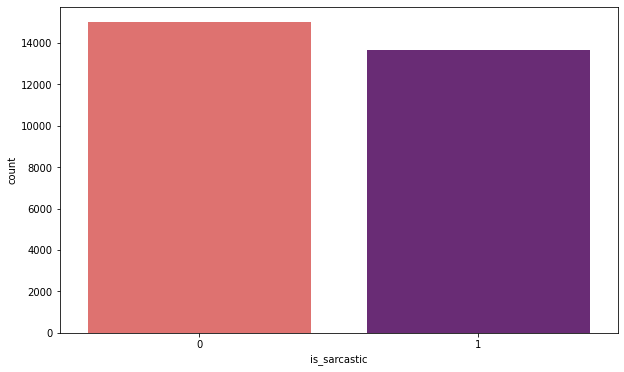

In [62]:
# Checking out the above graphically

plt.figure(figsize=(10,6))
sns.countplot(data['is_sarcastic'],palette='magma_r');

Sarcasm filled data is less compared to non-sarcastic but data overall is balanced

In [63]:
# Checking out the distribution based on the source of the comments

print(data['source'].value_counts())

huffingtonpost    14985
theonion          13634
Name: source, dtype: int64


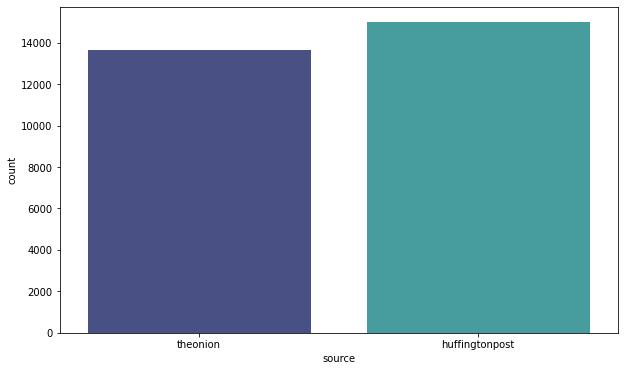

In [64]:
# Checking out the above graphically

plt.figure(figsize=(10,6))
sns.countplot(data['source'],palette='mako');

Here we can see that more data comes from huffingtonpost than theonion

## 2. Retain relevant columns.

In [65]:
# Retaining relevant columns 

temp_data = pd.DataFrame({'Features': data['headline'], 'Labels': data['is_sarcastic']}) 

In [66]:
# Displaying the data after changes

temp_data.sample(5)

,Features,Labels
1583,alligator and python locked in death duel on g...,0
8741,scott disick and 18-year-old lindsay vrckovnik...,0
5086,i'm mourning the old kidz bop kids,0
20113,louis c.k. reveals he once ruined a job for ji...,0
2965,google once made a promise not to be evil. wil...,0


Sarcastic WordCloud : 


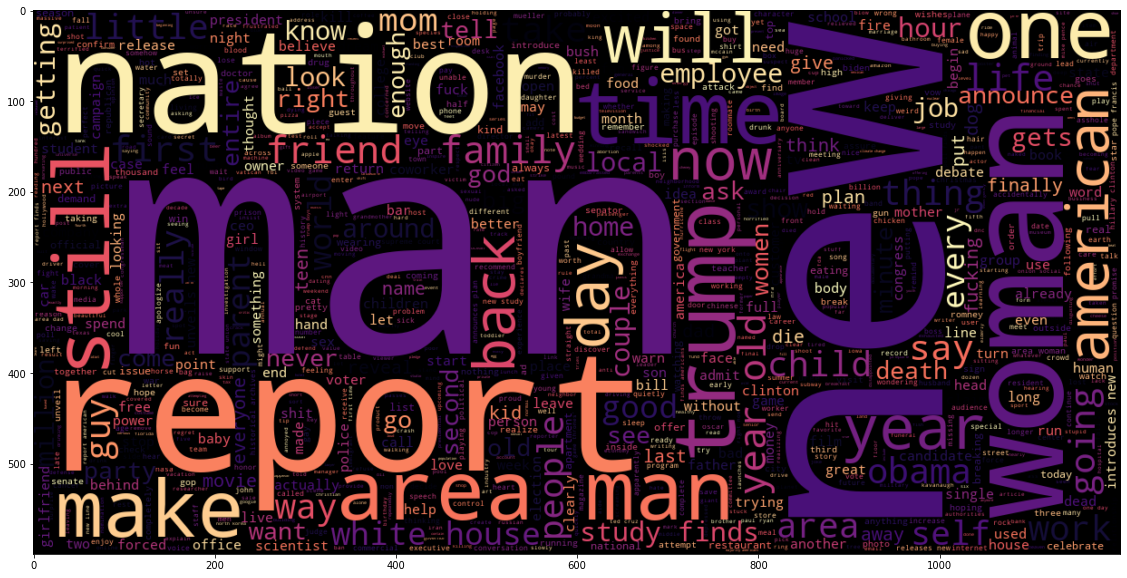

In [67]:
# Building WordCloud from Sarcastic data

print('Sarcastic WordCloud : ')
plt.figure(figsize=(30,10))
wordcloud = WordCloud(max_words = 1000, width=1200, height=600, colormap='magma').generate(' '.join(temp_data[temp_data.Labels==1].Features))
plt.imshow(wordcloud,interpolation='bilinear');

Unsarcastic WordCloud : 


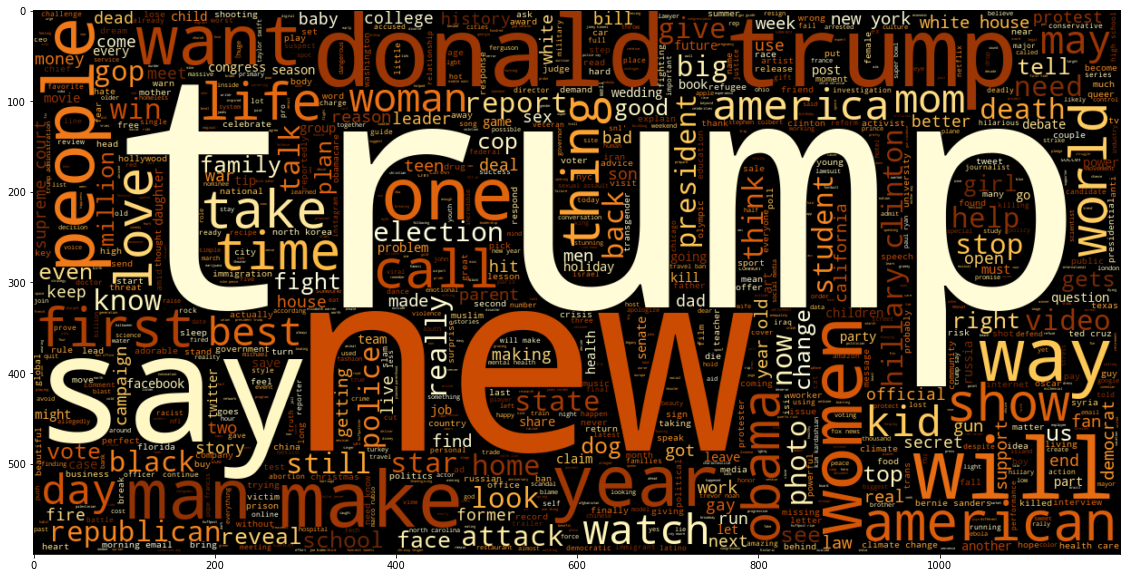

In [68]:
# Building WordCloud from unsarcastic data

print('Unsarcastic WordCloud : ')
plt.figure(figsize=(30,10))
wordcloud = WordCloud(max_words = 1000, width = 1200, height=600, colormap = 'YlOrBr').generate(' '.join(temp_data[temp_data.Labels==0].Features))
plt.imshow(wordcloud,interpolation='bilinear');

## 3. Get length of each sentence

In [69]:
data

,is_sarcastic,headline,article_link,source
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion
...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...,theonion
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...,theonion
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...,huffingtonpost
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...,theonion


In [70]:
# Capturing each sentence lengths

data['sentences_lengths'] = data['headline'].apply(lambda x: len(x))
data['sentences_lengths']

0        61
1        79
2        49
3        52
4        61
         ..
28614    44
28615    87
28616    71
28617    61
28618    34
Name: sentences_lengths, Length: 28619, dtype: int64

In [71]:
# Checking the stats on sentence lengths

data['sentences_lengths'].describe()

count    28619.000000
mean        62.308571
std         20.726483
min          7.000000
25%         49.000000
50%         62.000000
75%         75.000000
max        926.000000
Name: sentences_lengths, dtype: float64

- The length of headlines ranges between 7 and 926 which seems quite extreme
- Also seeing these values we can assume the prescence of outliers 

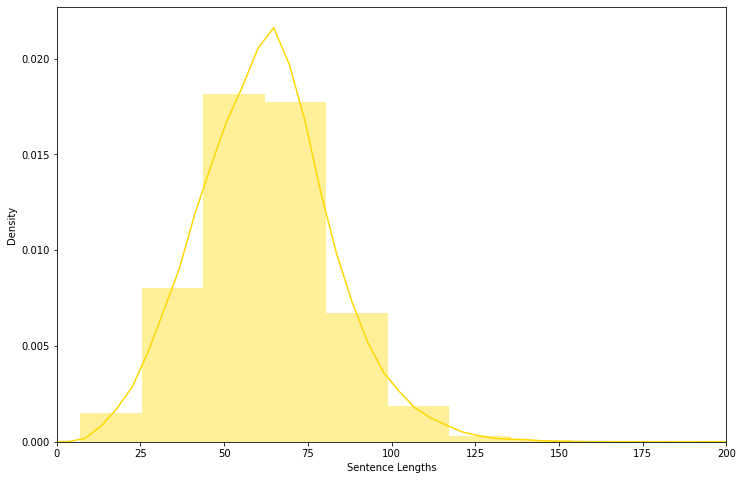

In [72]:
# Plotting sentence length distribution

plt.figure(figsize=(12,8))
plt.xlim(0, 200)

ax = sns.distplot(data['sentences_lengths'], color='gold')
ax.set(xlabel='Sentence Lengths');

Max count of sentence lengths lies between  25 and 100

## 4. Define parameters

In [73]:
# Initialising the parameters

vocab_size = 30000
oov_token = '*oov*'
max_length = 100
padding_type = 'post'
trunc_type = 'post'
embedding_dim = 50
batch_size = 128
num_epochs = 5

## 5. Get indices for words

In [74]:
# Getting the indices

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(temp_data['Features'])
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(temp_data['Features'])

print('Indices for words : \n', word_index)

Indices for words : 
 {'*oov*': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'at': 15, 'from': 16, 'about': 17, 'by': 18, 'after': 19, 'you': 20, 'this': 21, 'out': 22, 'up': 23, 'be': 24, 'as': 25, 'that': 26, 'it': 27, 'how': 28, 'not': 29, 'he': 30, 'his': 31, 'are': 32, 'your': 33, 'just': 34, 'what': 35, 'all': 36, 'who': 37, 'has': 38, 'will': 39, 'report': 40, 'into': 41, 'more': 42, 'one': 43, 'have': 44, 'year': 45, 'over': 46, 'why': 47, 'day': 48, 'u': 49, 'area': 50, 'woman': 51, 'can': 52, 's': 53, 'says': 54, 'donald': 55, 'time': 56, 'first': 57, 'like': 58, 'no': 59, 'her': 60, 'get': 61, 'off': 62, 'old': 63, "trump's": 64, 'life': 65, 'now': 66, 'people': 67, "'": 68, 'an': 69, 'house': 70, 'still': 71, 'obama': 72, 'white': 73, 'back': 74, 'make': 75, 'was': 76, 'than': 77, 'women': 78, 'if': 79, 'down': 80, 'when': 81, 'i': 82, 'my': 83, '5': 84, 'clinton': 85, 'could': 86, 'the

In [75]:
# Displaying a sample

X[0]

[16004, 355, 3167, 7474, 2644, 3, 661, 1119]

In [76]:
# Padding the data

X = pad_sequences(X, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [77]:
# Displaying a padded sample

X[0]

array([16004,   355,  3167,  7474,  2644,     3,   661,  1119,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [78]:
# Assigning the labels

y = np.asarray(temp_data['Labels'])

## 6. Create features and labels

In [79]:
# We have already created the features and labels so we can display the size and data

print("No. of Features: ", len(X))
print("Number of Labels: ", len(y))

No. of Features:  28619
Number of Labels:  28619


In [80]:
# Displaying sample feature and label

(X[0],y[0])

(array([16004,   355,  3167,  7474,  2644,     3,   661,  1119,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0], dtype=int32), 1)

## 7. Get vocabulary size

In [81]:
# Vocabulary Size

num_words = len(tokenizer.word_index) + 1
print('Total no. of words in tokenizer : ', num_words)

Total no. of words in tokenizer :  30886


## 8. Create a weight matrix using GloVe embeddings

In [82]:
embeddings = {}

for g in open('DataSet - glove.6B.50d.txt'):
  word = g.split(' ')[0]
  embed = g.split(' ')[1:]
  embed = np.asarray(embed, dtype=np.float32)
  embeddings[word] = embed

In [83]:
print('Length of embeddings: ', len(embeddings.values()))

Length of embeddings:  400000


In [84]:
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [85]:
print('Shape of embedding matrix : ', embedding_matrix.shape)

Shape of embedding matrix :  (30886, 50)


In [86]:
print('Embedding Matrix sample : \n')

embedding_matrix[100]

Embedding Matrix sample : 



array([ 0.53248   ,  0.030684  , -0.12955   , -0.15673   ,  0.25167999,
        0.20269001, -0.71868998, -0.27818999, -0.47384   ,  0.49715   ,
       -0.12525   , -0.249     ,  0.23788001,  0.11087   ,  0.44788   ,
       -0.10767   ,  0.44033   ,  0.16701999, -0.34068   , -0.5413    ,
       -0.56092   , -0.12457   ,  0.23586001,  0.39872   ,  0.13578001,
       -1.47650003, -1.13339996, -0.23475   ,  0.17915   ,  0.20182   ,
        3.95659995,  0.0092012 ,  0.61391002, -0.75382   ,  0.42118999,
        0.092947  , -0.26230001,  0.48914   , -0.78757   , -0.10654   ,
       -0.68392003,  0.34472001,  0.42789999,  0.71161002,  0.051375  ,
        0.33759001, -0.72083998,  0.069335  , -0.34333   , -0.067937  ])

## 9. Define and compile a Bidirectional LSTM model

In [87]:
y = y.reshape(-1,1)

In [88]:
# Splitting the training and validation data
# Not creating test data as not mentioned in the requirements

X_train, X_valid , y_train, y_valid = train_test_split(X, y, shuffle = True, random_state = 10, test_size = 0.25, stratify = y)

In [89]:
# Randomly shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

In [90]:
print('Shape of Training Data: ', X_train.shape)
print('Shape of Testing Data: ', X_valid.shape)

Shape of Training Data:  (21464, 100)
Shape of Testing Data:  (7155, 100)


In [91]:
# Building the model

# Creating the model
# Parameters have been instantiated earlier

model_1 = Sequential()

#Input Layer

model_1.add(Embedding(num_words, embedding_dim, weights = [embedding_matrix], input_length=max_length))

# Bidirectional LSTM Layer

model_1.add(tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True)))

model_1.add(GlobalAveragePooling1D())
model_1.add(Dense(32, activation='relu'))

# Output Layer

model_1.add(Dense(1, activation='sigmoid')) 

In [92]:
# Compiling the model

model_1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [93]:
# Displaying the model summary

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           1544300   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         183296    
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,735,853
Trainable params: 1,735,853
No

## 10. Fit the model and check the validation accuracy

In [94]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=3)

In [95]:
history = model_1.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, callbacks=[early_stop], validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/5
168/168 [==============================] - 7s 23ms/step - loss: 0.5658 - accuracy: 0.7101 - val_loss: 0.4709 - val_accuracy: 0.7897
Epoch 2/5
168/168 [==============================] - 3s 18ms/step - loss: 0.3691 - accuracy: 0.8436 - val_loss: 0.3533 - val_accuracy: 0.8467
Epoch 3/5
168/168 [==============================] - 3s 19ms/step - loss: 0.2502 - accuracy: 0.9020 - val_loss: 0.3295 - val_accuracy: 0.8642
Epoch 4/5
168/168 [==============================] - 3s 19ms/step - loss: 0.1688 - accuracy: 0.9384 - val_loss: 0.3315 - val_accuracy: 0.8674
Epoch 5/5
168/168 [==============================] - 3s 19ms/step - loss: 0.1105 - accuracy: 0.9631 - val_loss: 0.4797 - val_accuracy: 0.8312


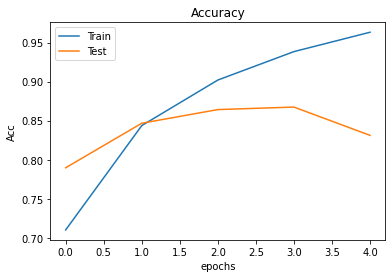

In [96]:
# Plotting and analysing the accuracy

plt.figure()
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.title('Accuracy')
plt.ylabel('Acc')
plt.xlabel("epochs")
plt.legend()
plt.show()

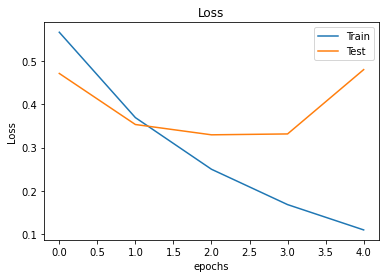

In [97]:
# Plotting and analysing the loss

plt.figure()
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel("epochs")
plt.legend()
plt.show()

In [98]:
# Predicting for all of test dataset 

model_1_predictions = model_1.predict(X_valid, batch_size=batch_size).round().astype(int)

In [99]:
# Evaluating model on validation data as per the requirement

validation_loss, validation_accuracy = model_1.evaluate(X_valid, y_valid, verbose=0)
print('Test Accuracy: %.2f%%' % (validation_accuracy*100))
print('Test Loss: %.4f'% validation_loss)

Test Accuracy: 83.12%
Test Loss: 0.4797


In [100]:
model_1_predictions = [np.round(x[0]) for x in model_1_predictions]

In [101]:
# Classification Report

print(classification_report(y_valid, model_1_predictions, target_names = ['Unsarcastic','Sarcastic']))

              precision    recall  f1-score   support

 Unsarcastic       0.77      0.96      0.86      3746
   Sarcastic       0.94      0.69      0.80      3409

    accuracy                           0.83      7155
   macro avg       0.85      0.82      0.83      7155
weighted avg       0.85      0.83      0.83      7155



Class level accuracy can be improvised by tuning the model based on the business requirements

The above model is doing quite well.During the training, model is learning quite smoothly but same can't be seen for validation

Let's us now try to improvise the previous model

In [102]:
# Building a new model

# Clear previous session

tf.keras.backend.clear_session() 

# Creating a new model

model_2 = Sequential()

# Input Layer

model_2.add(Embedding(num_words, embedding_dim, weights = [embedding_matrix], input_length=max_length)) 

# Bidirectional LSTM Layer

model_2.add(Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))) 

model_2.add(GlobalAveragePooling1D())
model_2.add(Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(l=0.007))) 
model_2.add(Dropout(0.3))
model_2.add(Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(l=0.006)))
model_2.add(Dropout(0.3))
model_2.add(Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(l=0.005)))
model_2.add(Dropout(0.3))
model_2.add(Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(l=0.004)))
model_2.add(Dropout(0.3))

# Output Layer

model_2.add(Dense(1, activation='sigmoid')) 

In [103]:
# Compiling the model

adam_opt = tf.keras.optimizers.Adam(lr=0.0001)
model_2.compile(loss='binary_crossentropy',optimizer=adam_opt, metrics=['accuracy'])

In [104]:
# Displaying the model summary

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           1544300   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 512)         628736    
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 512)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [105]:
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)

In [106]:
history = model_2.fit(X_train, y_train, batch_size = batch_size, epochs = 10, callbacks=[early_stop], validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/10
168/168 [==============================] - 9s 38ms/step - loss: 3.2444 - accuracy: 0.5580 - val_loss: 2.8014 - val_accuracy: 0.6442
Epoch 2/10
168/168 [==============================] - 6s 34ms/step - loss: 2.4970 - accuracy: 0.6700 - val_loss: 2.1857 - val_accuracy: 0.7050
Epoch 3/10
168/168 [==============================] - 6s 34ms/step - loss: 1.9710 - accuracy: 0.7264 - val_loss: 1.7593 - val_accuracy: 0.7251
Epoch 4/10
168/168 [==============================] - 6s 34ms/step - loss: 1.5876 - accuracy: 0.7707 - val_loss: 1.4179 - val_accuracy: 0.7690
Epoch 5/10
168/168 [==============================] - 6s 34ms/step - loss: 1.2920 - accuracy: 0.8081 - val_loss: 1.1623 - val_accuracy: 0.8050
Epoch 6/10
168/168 [==============================] - 6s 34ms/step - loss: 1.0505 - accuracy: 0.8472 - val_loss: 0.9652 - val_accuracy: 0.8335
Epoch 7/10
168/168 [==============================] - 6s 33ms/step - loss: 0.8756 - accuracy: 0.8695 - val_loss: 0.8326 - val_accuracy: 0.8403

In [107]:
# Predicting for all of test dataset
 
model_2_predictions = model_2.predict(X_valid, batch_size=1024).round().astype(int)

In [108]:
# Classification Report

print(classification_report(y_valid, model_2_predictions, target_names = ['Unsarcastic','Sarcastic']))

              precision    recall  f1-score   support

 Unsarcastic       0.88      0.85      0.86      3746
   Sarcastic       0.84      0.87      0.85      3409

    accuracy                           0.86      7155
   macro avg       0.86      0.86      0.86      7155
weighted avg       0.86      0.86      0.86      7155



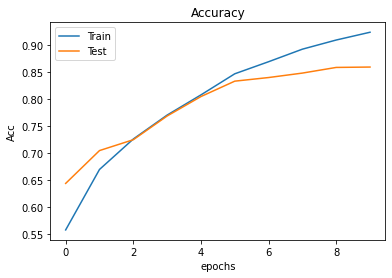

In [109]:
# Plotting and analysing the accuracy

plt.figure()
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.title('Accuracy')
plt.ylabel('Acc')
plt.xlabel("epochs")
plt.legend()
plt.show()

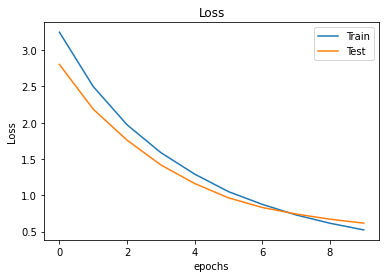

In [110]:
# Plotting and analysing the loss

plt.figure()
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel("epochs")
plt.legend()
plt.show()

Here we can see that training and validation values are changing smoothly with each other.Class level accuracy is more balanced for second model but if one needs to be prioritised then first model can be preferred.Overfitting is less but the training time is higher compared to the previous model.Hence, based on needs and the constraints appropriate model can be chosen as the best.If we have to choose less over fitting model which will perform good on unseen data we can choose the second model and if we want model to train faster with less loss relatively then we can opt for the first model.